## Import Packages

In [1]:
import pandas as pd
import numpy as np

## Exploratory Data Analysis

In [16]:
df = pd.read_csv('data/5guys_flight_data.csv')
print(df)

/var/folders/36/xfvf6zw53bd2ht35p52k28qh0000gn/T/ipykernel_1664/3290093427.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/5guys_flight_data.csv')


         MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM  \
0            1            28            1                UA   N13718   
1            1            28            1                EV   N14902   
2            1            28            1                UA   N56859   
3            1            28            1                UA   N37253   
4            1            28            1                UA   N57864   
...        ...           ...          ...               ...      ...   
6593304     12            25            3                HA   N492HA   
6593305     12            25            3                HA   N495HA   
6593306     12            10            2                G4    230NV   
6593307     12            10            2                G4    249NV   
6593308     12             3            2                G4    249NV   

         OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN ORIGIN_CITY_NAME_x  \
0                      830              13930    ORD        

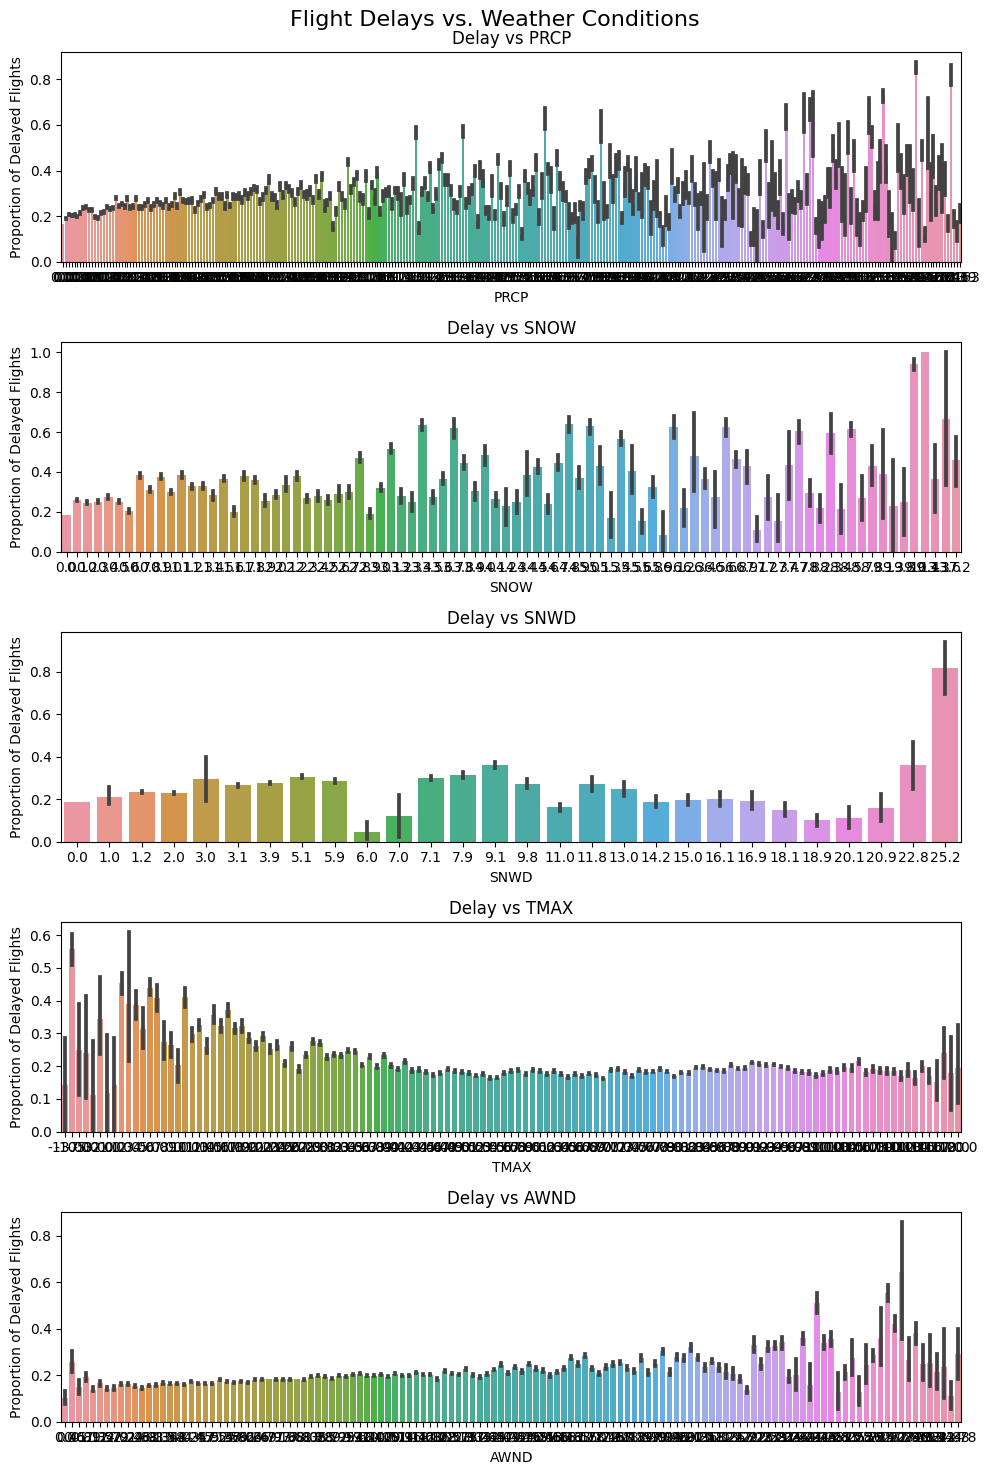

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with delayed and not delayed flights
delayed_flights = df[df['DEP_DEL15'] == 1]
not_delayed_flights = df[df['DEP_DEL15'] == 0]

# Weather columns of interest
weather_columns = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']

# Create subplots for each weather condition
fig, axes = plt.subplots(nrows=len(weather_columns), ncols=1, figsize=(10, 15))
fig.suptitle('Flight Delays vs. Weather Conditions', fontsize=16)

for i, weather_column in enumerate(weather_columns):
    # Plot delayed and not delayed flights for each weather condition
    ax = axes[i]
    sns.barplot(x=weather_column, y='DEP_DEL15', data=df, ax=ax)
    ax.set_title(f'Delay vs {weather_column}')
    ax.set_xlabel(f'{weather_column}')
    ax.set_ylabel('Proportion of Delayed Flights')

plt.tight_layout()
plt.show()


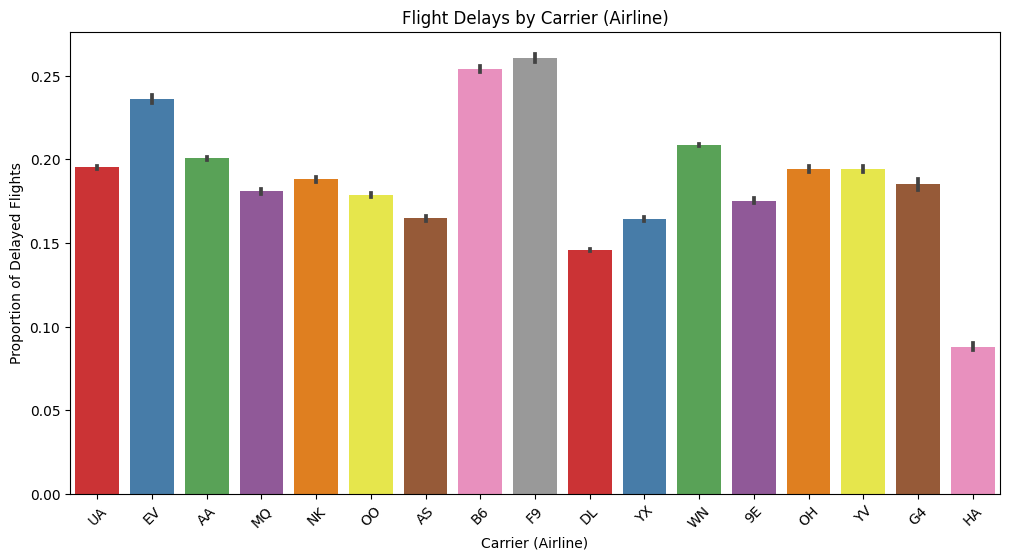

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to show flight delays by carrier (airline)
plt.figure(figsize=(12, 6))
sns.barplot(x='OP_UNIQUE_CARRIER', y='DEP_DEL15', data=df, palette="Set1")
plt.title('Flight Delays by Carrier (Airline)')
plt.xlabel('Carrier (Airline)')
plt.ylabel('Proportion of Delayed Flights')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


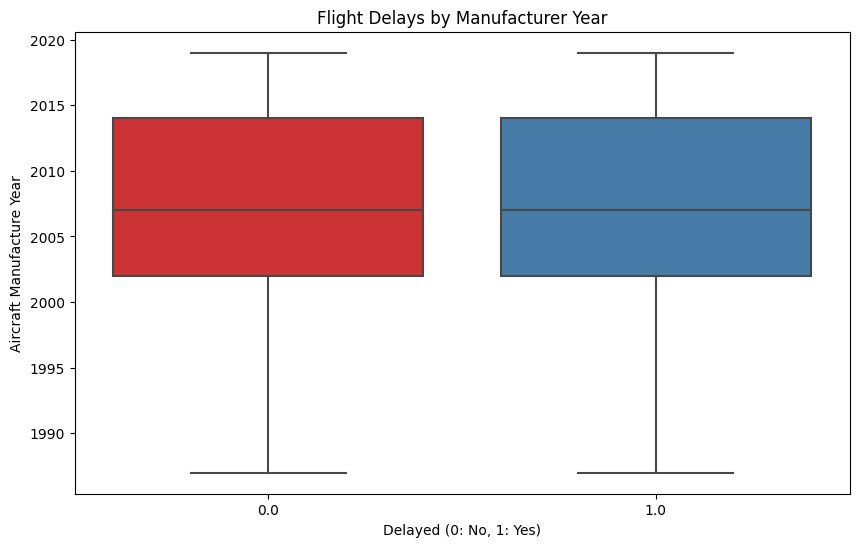

In [8]:
# Create a box plot to show the relationship between flight delays and the aircraft manufacture year
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEP_DEL15', y='MANUFACTURE_YEAR', data=df, palette="Set1")
plt.title('Flight Delays by Manufacturer Year')
plt.xlabel('Delayed (0: No, 1: Yes)')
plt.ylabel('Aircraft Manufacture Year')
plt.show()

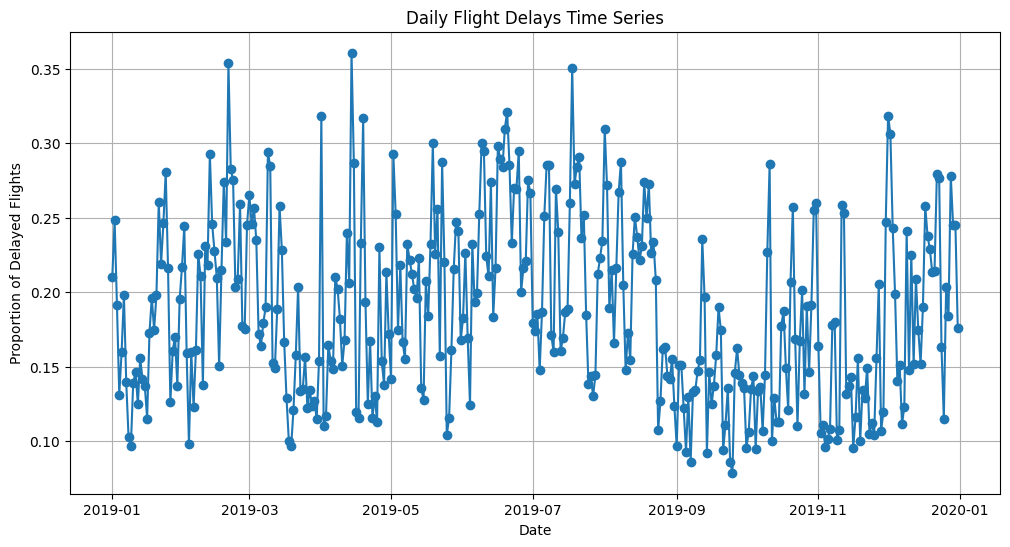

In [9]:
# Assuming 'DATE' is the column containing the date information
# and 'DEP_DEL15' is the column indicating flight delays (1: Yes, 0: No)
df['DATE'] = pd.to_datetime(df['DATE'])  # Convert the 'DATE' column to a datetime object
df.set_index('DATE', inplace=True)  # Set the date as the index of the DataFrame

# Resample the data to daily frequency and calculate the proportion of delayed flights
daily_delays = df['DEP_DEL15'].resample('D').mean()

# Create a time series plot for daily flight delays
plt.figure(figsize=(12, 6))
plt.plot(daily_delays.index, daily_delays, marker='o', linestyle='-')
plt.title('Daily Flight Delays Time Series')
plt.xlabel('Date')
plt.ylabel('Proportion of Delayed Flights')
plt.grid(True)
plt.show()

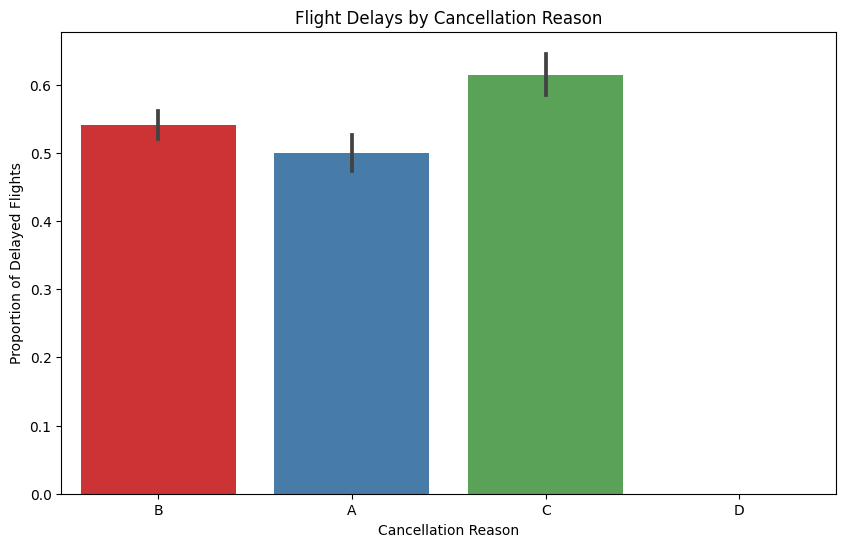

In [10]:
# Create a bar plot to show flight delays by cancellation reason
plt.figure(figsize=(10, 6))
sns.barplot(x='CANCELLATION_CODE', y='DEP_DEL15', data=df, palette="Set1")
plt.title('Flight Delays by Cancellation Reason')
plt.xlabel('Cancellation Reason')
plt.ylabel('Proportion of Delayed Flights')
plt.show()

## Preprocessing

In [13]:
missing_values = df.isnull().sum()
print(missing_values.to_string())


MONTH                         0
DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
TAIL_NUM                      0
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN                        0
ORIGIN_CITY_NAME_x            0
DEST_AIRPORT_ID               0
DEST                          0
DEST_CITY_NAME                0
CRS_DEP_TIME                  0
DEP_TIME                      0
DEP_DELAY_NEW                11
DEP_DEL15                    11
DEP_TIME_BLK                  0
CRS_ARR_TIME                  0
ARR_TIME                   6916
ARR_DELAY_NEW             21480
ARR_TIME_BLK                  0
CANCELLED                     0
CANCELLATION_CODE       6588864
CRS_ELAPSED_TIME              2
ACTUAL_ELAPSED_TIME       21480
DISTANCE                      0
DISTANCE_GROUP                0
CARRIER_DELAY           5328016
WEATHER_DELAY           5328016
NAS_DELAY               5328016
SECURITY_DELAY          5328016
LATE_AIR

In [18]:
#ORIGIN, ORIGIN CITY, TAIL_NUM
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to your categorical column and transform it
df['OP_UNIQUE_CARRIER'] = label_encoder.fit_transform(df['OP_UNIQUE_CARRIER'])
print(df['OP_UNIQUE_CARRIER'])


0          13
1           5
2          13
3          13
4          13
           ..
6593304     8
6593305     8
6593306     7
6593307     7
6593308     7
Name: OP_UNIQUE_CARRIER, Length: 6593309, dtype: int64


## Training

## Evaluation